In [ ]:
# https://github.com/hhuynh000/EE399_HW4
import numpy as np
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from matplotlib import cm

from keras.datasets import mnist

# For Progress Bar
from tqdm import tqdm

## Part I

In [ ]:
# generate dataset
X=np.arange(0,30)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54])

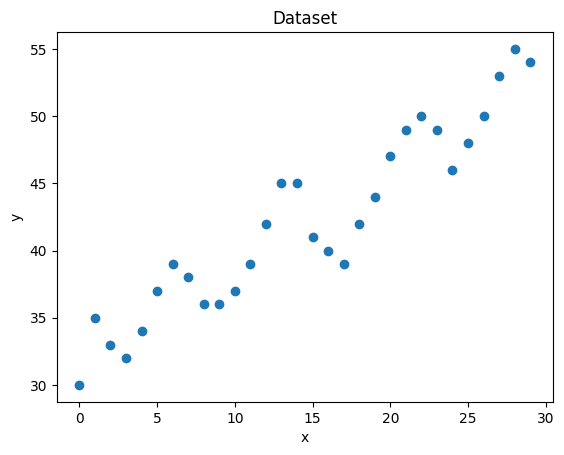

In [ ]:
# plot data
plt.figure()
plt.title('Dataset')
plt.scatter(X,Y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [ ]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def train(net, train_X, train_Y, num_epochs):
    # Initialize the network and define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)

    # Train the network
    for epoch in range(num_epochs):
        loss_record = []
        for i, (x, y) in enumerate(zip(train_X, train_Y)):
            optimizer.zero_grad()
            outputs = net(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            loss_record.append(loss.item())

        mean_loss = np.mean(loss_record)
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, mean_loss))

In [ ]:
def test(net, X, Y):
    pred = []
    with torch.no_grad():
        lsqe = 0
        total = 0
        for x, y in zip(X, Y.numpy()):
            predicted = net(x).numpy()
            pred.append(predicted)
            total += 1
            lsqe += (y - predicted)**2

        lsqe = np.sqrt(lsqe)
        print('Least square error of the network: {} '.format(100 * lsqe / total))
        return pred

### Using the first 20 data points as training data and remaining 10 data points as test data

In [ ]:
# split train and test dataset
train_X = torch.tensor(X[:20]).reshape(20,1).float()
train_Y = torch.tensor(Y[:20]).reshape(20,1).float()

test_X = torch.tensor(X[20:]).reshape(10,1).float()
test_Y = torch.tensor(Y[20:]).reshape(10,1).float()

In [ ]:
net = Net()

In [ ]:
train(net, train_X, train_Y, 100)

Epoch [1/100], Loss: 1285.6279
Epoch [2/100], Loss: 1077.5270
Epoch [3/100], Loss: 876.4373
Epoch [4/100], Loss: 675.2195
Epoch [5/100], Loss: 496.7774
Epoch [6/100], Loss: 370.4212
Epoch [7/100], Loss: 308.4784
Epoch [8/100], Loss: 286.3909
Epoch [9/100], Loss: 277.9016
Epoch [10/100], Loss: 274.0450
Epoch [11/100], Loss: 271.8825
Epoch [12/100], Loss: 270.0637
Epoch [13/100], Loss: 268.1910
Epoch [14/100], Loss: 269.3897
Epoch [15/100], Loss: 263.6701
Epoch [16/100], Loss: 262.2379
Epoch [17/100], Loss: 260.7304
Epoch [18/100], Loss: 258.9504
Epoch [19/100], Loss: 257.0724
Epoch [20/100], Loss: 255.1773
Epoch [21/100], Loss: 253.2744
Epoch [22/100], Loss: 251.3675
Epoch [23/100], Loss: 249.4513
Epoch [24/100], Loss: 247.5212
Epoch [25/100], Loss: 245.5749
Epoch [26/100], Loss: 243.6111
Epoch [27/100], Loss: 241.6142
Epoch [28/100], Loss: 239.5726
Epoch [29/100], Loss: 237.5044
Epoch [30/100], Loss: 235.4104
Epoch [31/100], Loss: 233.2593
Epoch [32/100], Loss: 231.0446
Epoch [33/100],

In [ ]:
# Test the network on training data
y_pred_train = test(net, train_X, train_Y)

Least square error of the network: [86.57725] 


In [ ]:
# Test the network on testing data
y_pred_test = test(net, test_X, test_Y)

Least square error of the network: [269.67526] 


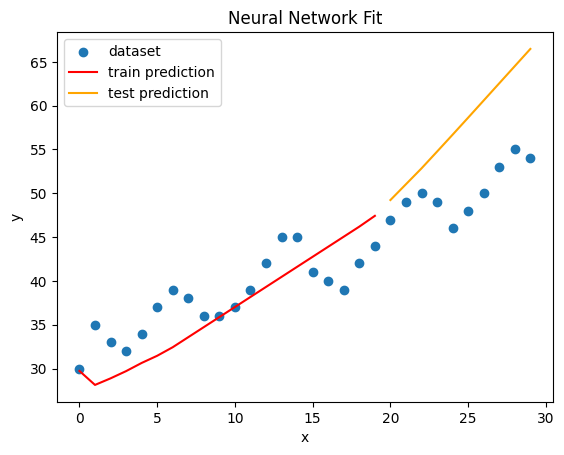

In [ ]:
plt.figure()
plt.title('Neural Network Fit')
plt.scatter(X, Y, label='dataset')
plt.plot(train_X, y_pred_train, label='train prediction', color='r')
plt.plot(test_X, y_pred_test, label='test prediction', color='orange')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

### Using the first 10 and last 10 data points as training data and the middle 10 data points as test data

In [ ]:
# split train and test dataset
train_X = torch.tensor(np.concatenate((X[:10], X[20:]))).reshape(20,1).float()
train_Y = torch.tensor(np.concatenate((Y[:10], Y[20:]))).reshape(20,1).float()

test_X = torch.tensor(X[10:20]).reshape(10,1).float()
test_Y = torch.tensor(Y[10:20]).reshape(10,1).float()

In [ ]:
net = Net()

In [ ]:
train(net, train_X, train_Y, 100)

Epoch [1/100], Loss: 1487.4783
Epoch [2/100], Loss: 1108.0120
Epoch [3/100], Loss: 777.5494
Epoch [4/100], Loss: 526.2633
Epoch [5/100], Loss: 387.6232
Epoch [6/100], Loss: 344.2459
Epoch [7/100], Loss: 333.0757
Epoch [8/100], Loss: 328.7869
Epoch [9/100], Loss: 327.4236
Epoch [10/100], Loss: 326.0852
Epoch [11/100], Loss: 324.2790
Epoch [12/100], Loss: 322.2599
Epoch [13/100], Loss: 320.1724
Epoch [14/100], Loss: 318.0094
Epoch [15/100], Loss: 315.7234
Epoch [16/100], Loss: 313.5096
Epoch [17/100], Loss: 311.2712
Epoch [18/100], Loss: 309.0763
Epoch [19/100], Loss: 306.8142
Epoch [20/100], Loss: 304.4706
Epoch [21/100], Loss: 302.0790
Epoch [22/100], Loss: 299.6224
Epoch [23/100], Loss: 297.0730
Epoch [24/100], Loss: 294.4216
Epoch [25/100], Loss: 291.6091
Epoch [26/100], Loss: 288.4904
Epoch [27/100], Loss: 285.1661
Epoch [28/100], Loss: 281.6986
Epoch [29/100], Loss: 278.4128
Epoch [30/100], Loss: 275.1225
Epoch [31/100], Loss: 272.1118
Epoch [32/100], Loss: 268.4433
Epoch [33/100],

In [ ]:
# Test the network on training data
y_pred_train = test(net, train_X, train_Y)

Least square error of the network: [41.61445] 


In [ ]:
# Test the network on testing data
y_pred_test = test(net, test_X, test_Y)

Least square error of the network: [91.8409] 


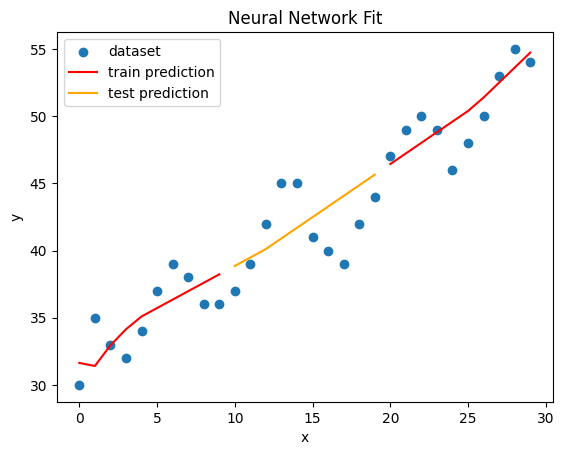

In [ ]:
plt.figure()
plt.title('Neural Network Fit')
plt.scatter(X, Y, label='dataset')
plt.plot(train_X[:10], y_pred_train[:10], label='train prediction', color='r')
plt.plot(train_X[10:], y_pred_train[10:], color='r')
plt.plot(test_X, y_pred_test, label='test prediction', color='orange')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

## Part II

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1]**2)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1]**2)

print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


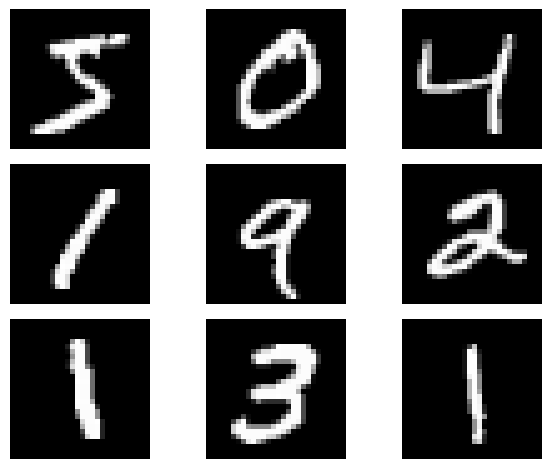

In [ ]:
plt.figure()
for i in range(9):  
    plt.subplot(3, 3, 1 + i)
    plt.imshow(train_x[i].reshape(28, 28), cmap=cm.gray)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Compute the first 20 PCA modes of the digit images

In [ ]:
X_data = np.vstack((train_x, test_x))
print(X_data.shape)

(70000, 784)


In [ ]:
pca = PCA(n_components=20)
pca.fit(X_data)
componenets = pca.components_

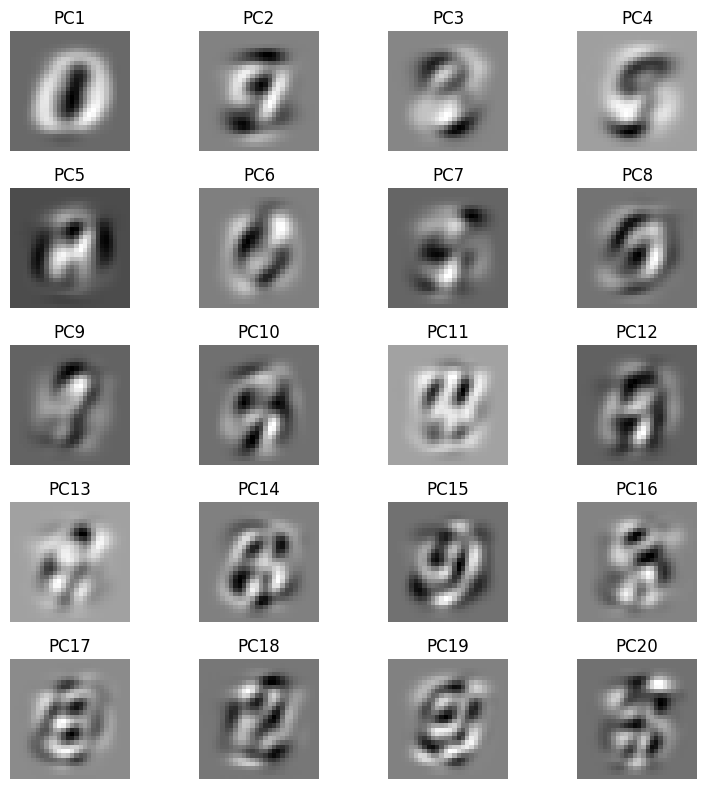

In [ ]:
plt.figure(figsize=(8,8))
for i in range(componenets.shape[0]):  
    plt.subplot(5, 4, 1 + i)
    plt.imshow(componenets[i].reshape(28, 28), cmap=cm.gray)
    plt.axis('off')
    plt.title('PC' + str(i+1))
plt.tight_layout()
plt.show()

### Build a feed-foward neural network to classify the digits

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('data/train', download=True, train=True, transform=transform)
testset = datasets.MNIST('data/test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
# Define the neural network architecture
class ImageNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
def train(net, dataloader, num_epochs):
    # Initialize the network and define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)
    
    # Train the network
    for epoch in range(num_epochs):
        loss_record = []
        train_pbar = tqdm(dataloader, position=0, leave=True)
        for x, y in train_pbar:
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device) 
            outputs = net(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            loss_record.append(loss.item())

        mean_loss = np.mean(loss_record)
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, mean_loss))

In [ ]:
def validate(model, test_loader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
image_net = ImageNet().to(device)

In [ ]:
train(image_net, trainloader, 30)

100%|██████████| 938/938 [00:16<00:00, 55.39it/s]


Epoch [1/30], Loss: 0.4511


100%|██████████| 938/938 [00:16<00:00, 55.93it/s]


Epoch [2/30], Loss: 0.2272


100%|██████████| 938/938 [00:17<00:00, 53.80it/s]


Epoch [3/30], Loss: 0.1703


100%|██████████| 938/938 [00:16<00:00, 56.56it/s]


Epoch [4/30], Loss: 0.1352


100%|██████████| 938/938 [00:16<00:00, 55.65it/s]


Epoch [5/30], Loss: 0.1109


100%|██████████| 938/938 [00:17<00:00, 52.93it/s]


Epoch [6/30], Loss: 0.0967


100%|██████████| 938/938 [00:16<00:00, 56.74it/s]


Epoch [7/30], Loss: 0.0825


100%|██████████| 938/938 [00:16<00:00, 55.68it/s]


Epoch [8/30], Loss: 0.0736


100%|██████████| 938/938 [00:17<00:00, 53.46it/s]


Epoch [9/30], Loss: 0.0664


100%|██████████| 938/938 [00:16<00:00, 56.81it/s]


Epoch [10/30], Loss: 0.0587


100%|██████████| 938/938 [00:16<00:00, 55.52it/s]


Epoch [11/30], Loss: 0.0532


100%|██████████| 938/938 [00:16<00:00, 57.73it/s]


Epoch [12/30], Loss: 0.0491


100%|██████████| 938/938 [00:16<00:00, 58.40it/s]


Epoch [13/30], Loss: 0.0449


100%|██████████| 938/938 [00:16<00:00, 56.03it/s]


Epoch [14/30], Loss: 0.0409


100%|██████████| 938/938 [00:16<00:00, 56.19it/s]


Epoch [15/30], Loss: 0.0373


100%|██████████| 938/938 [00:16<00:00, 57.34it/s]


Epoch [16/30], Loss: 0.0349


100%|██████████| 938/938 [00:16<00:00, 55.84it/s]


Epoch [17/30], Loss: 0.0305


100%|██████████| 938/938 [00:16<00:00, 58.03it/s]


Epoch [18/30], Loss: 0.0294


100%|██████████| 938/938 [00:16<00:00, 57.84it/s]


Epoch [19/30], Loss: 0.0258


100%|██████████| 938/938 [00:16<00:00, 56.88it/s]


Epoch [20/30], Loss: 0.0252


100%|██████████| 938/938 [00:16<00:00, 56.19it/s]


Epoch [21/30], Loss: 0.0221


100%|██████████| 938/938 [00:16<00:00, 57.83it/s]


Epoch [22/30], Loss: 0.0236


100%|██████████| 938/938 [00:16<00:00, 56.40it/s]


Epoch [23/30], Loss: 0.0216


100%|██████████| 938/938 [00:16<00:00, 56.33it/s]


Epoch [24/30], Loss: 0.0172


100%|██████████| 938/938 [00:16<00:00, 57.62it/s]


Epoch [25/30], Loss: 0.0194


100%|██████████| 938/938 [00:16<00:00, 56.60it/s]


Epoch [26/30], Loss: 0.0194


100%|██████████| 938/938 [00:16<00:00, 56.58it/s]


Epoch [27/30], Loss: 0.0156


100%|██████████| 938/938 [00:16<00:00, 58.41it/s]


Epoch [28/30], Loss: 0.0143


100%|██████████| 938/938 [00:16<00:00, 58.04it/s]


Epoch [29/30], Loss: 0.0140


100%|██████████| 938/938 [00:16<00:00, 55.44it/s]

Epoch [30/30], Loss: 0.0140


In [ ]:
torch.save(image_net.state_dict(), 'image_net.ckpt')

In [ ]:
image_net = ImageNet().to(device)
image_net.load_state_dict(torch.load('image_net.ckpt'))

<All keys matched successfully>

In [ ]:
validate(image_net, testloader)

Accuracy of the network on the 10000 test images: 97 %
